# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
raw_data = pd.read_excel('Dataset1 .xlsx')
raw_data.sample(20)

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,repetition,rerepetition,stimulus,restimulus
70427,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0732,0.1514,0.0024,0.0024,4,0,9,0
40914,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.4199,0.1343,0.0024,0.0610,9,9,5,5
52746,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1807,0.0952,0.0024,0.0635,3,3,7,7
34220,0.1489,0.3271,0.2808,0.1001,0.0049,0.0293,1.0498,0.4834,0.2856,0.1807,1,1,5,5
41121,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.3076,0.1294,0.0024,0.0610,0,0,0,0
61930,0.1465,0.0024,0.0024,0.0024,0.0024,0.0024,0.1587,0.0757,0.1172,0.0415,4,4,8,8
85676,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0830,0.0757,0.0024,0.0024,0,0,0,0
59991,0.0464,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0024,0.0513,2,0,8,0
61329,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0781,0.0342,0.0049,0.0146,0,0,0,0
69523,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.1025,0.2271,0.0098,0.0146,3,0,9,0


# Exploratory Data Analysis

In [3]:
def EDA(df):
        
    print('\033[1m' + 'Shape of the data :' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatpes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data' + '\033[0m')
    print(df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Outliers in the data :' + '\033[0m')
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    print(outliers.sum(), 
          '\n------------------------------------------------------------------------------------\n')
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(raw_data)

Shape of the data :
(101014, 14) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 'emg9',
       'emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101014 entries, 0 to 101013
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   emg1          101014 non-null  float64
 1   emg2          101014 non-null  float64
 2   emg3          101014 non-null  float64
 3   emg4          101014 non-null  float64
 4   emg5          101014 non-null  float64
 5   emg6          101014 non-null  float64
 6   emg7          101014 non-null  float64
 7   emg8          101014 non-null  float64
 8   e

In [4]:
# Listing out unique values from height column

In [5]:
print("Unique height values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique height values and their counts :
0     39063
2      5174
4      5173
5      5173
12     5173
8      5172
7      5171
6      5170
11     5166
3      5158
1      5149
10     5137
9      5135
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

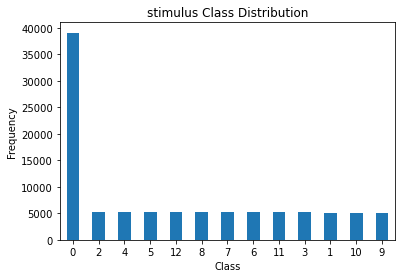

In [6]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

sns.pairplot(raw_data,hue = "stimulus")

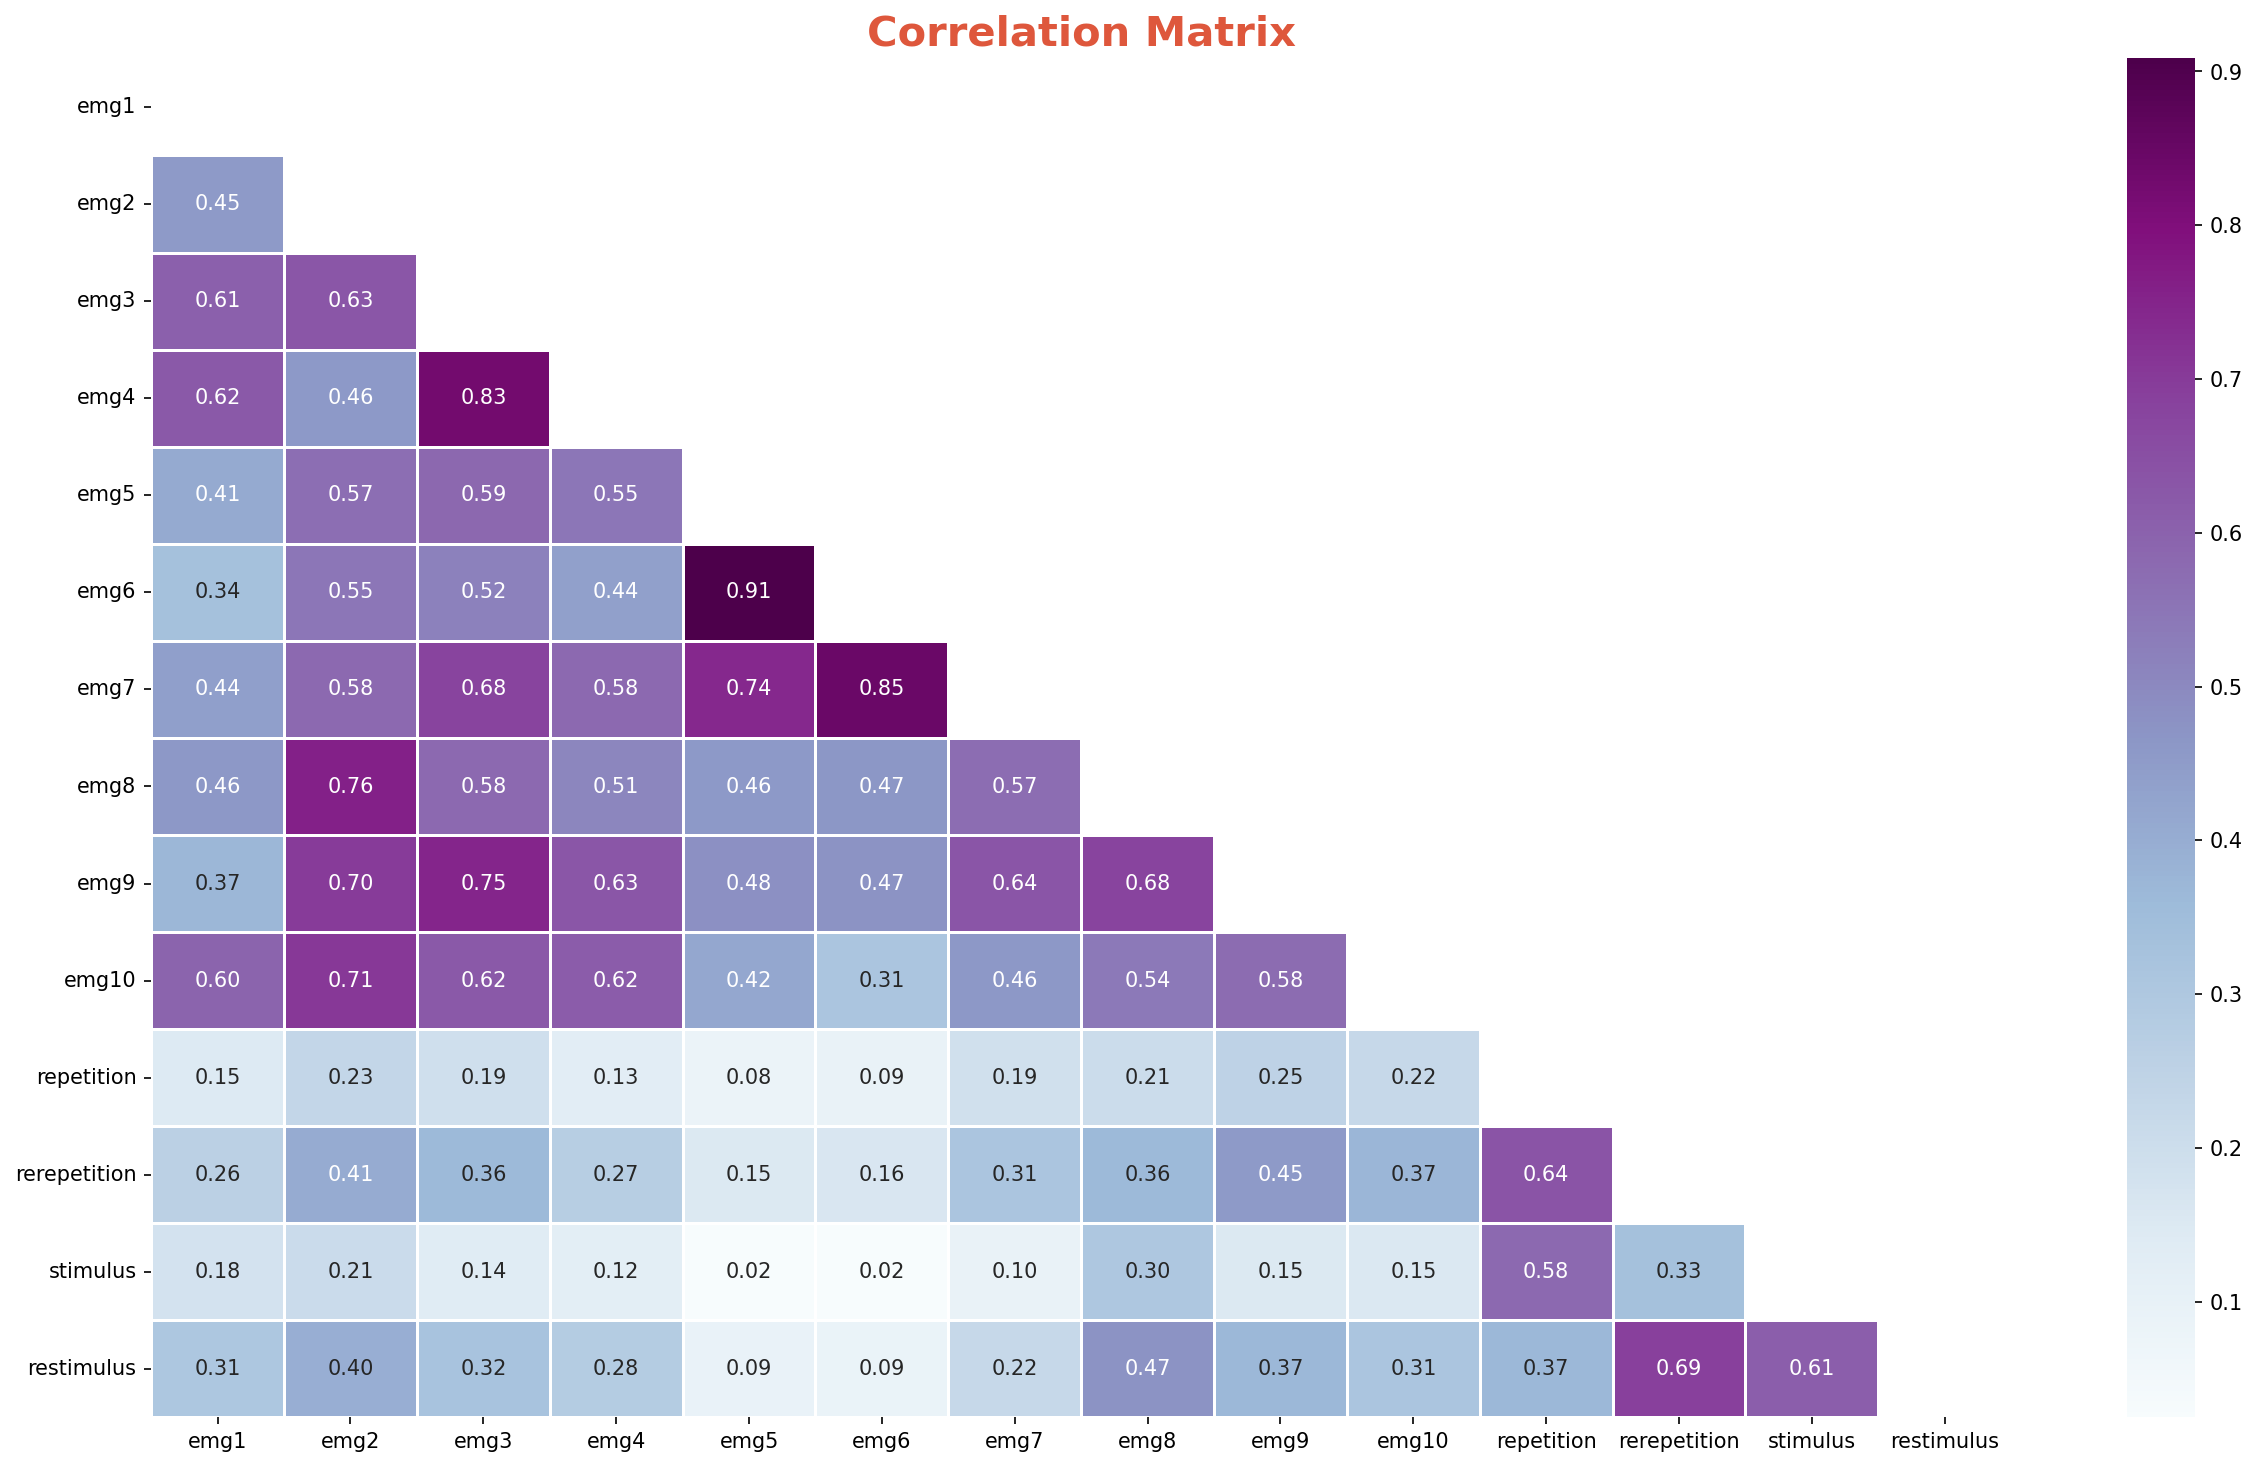

In [7]:
# Correlation matrix

plt.figure(figsize = (20, 12), dpi = 150)

corr = raw_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr,
            mask = mask,
            cmap = 'BuPu',
            annot = True,
            linewidths = 0.5,
            fmt = ".2f")

plt.title('Correlation Matrix',
          fontsize = 20,
          weight = 'semibold',
          color = '#de573c')
plt.show()

<AxesSubplot:title={'center':'Correlation with stimulus'}>

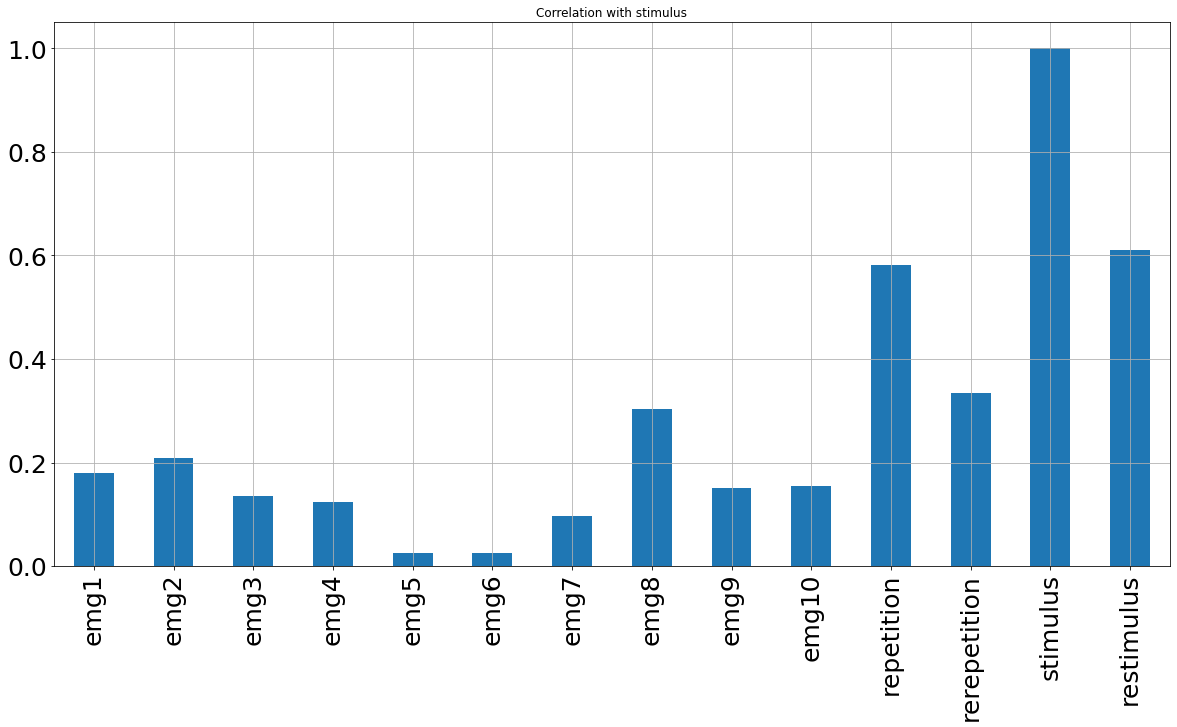

In [8]:
raw_data.corrwith(raw_data['stimulus']).plot.bar(
        figsize = (20, 10), title = "Correlation with stimulus", fontsize = 25,
        rot = 90, grid = True)

In [9]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Power Transformer Scaler

In [10]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [11]:
df1 = pd.DataFrame(scaler.fit_transform(X))

In [12]:
df1

,0,1,2,3,4,5,6,7,8,9
0,1.635051,-0.509939,-0.56555,-0.44194,-0.306644,3.453951,-1.03369,-0.485204,-0.632191,0.271961
1,1.476043,-0.509939,-0.56555,-0.44194,-0.306644,1.980883,-1.03369,-0.667598,-0.632191,0.117158
2,1.431175,-0.509939,-0.56555,-0.44194,-0.306644,1.980883,-1.03369,-0.730596,-0.632191,-0.051122
3,1.431175,-0.509939,-0.56555,-0.44194,-0.306644,1.980883,-1.03369,-0.864137,-0.632191,-0.329536
4,1.275607,-0.509939,-0.56555,-0.44194,-0.306644,-0.284669,-1.03369,-0.797889,-0.632191,-0.433213
...,...,...,...,...,...,...,...,...,...,...
101009,-0.690887,-0.509939,-0.56555,-0.44194,2.739467,-0.284669,-1.03369,-0.797889,-0.632191,-1.008944
101010,-0.690887,-0.509939,-0.56555,-0.44194,-0.306644,-0.284669,-1.03369,-0.864137,-0.632191,-1.008944
101011,-0.690887,-0.509939,-0.56555,-0.44194,-0.306644,-0.284669,-1.03369,-0.864137,-0.632191,-0.762940
101012,-0.690887,-0.509939,-0.56555,-0.44194,-0.306644,-0.284669,-1.03369,-0.797889,-0.632191,-0.762940


In [13]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state = 39)

# Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred3)}")

Accuracy of the classifier is: 0.6851457704301341


# KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier()
classifier3.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier3.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.6790575657080632


# Support Vector Machine

In [20]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred2 = svm.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred2)}")

Accuracy of the classifier is: 0.6612879275355146


# Decision Tree

In [23]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred4 = tree.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred4)}")

Accuracy of the classifier is: 0.6310943919219918


# Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred5 = LogisticRegression.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred5)}")

Accuracy of the classifier is: 0.5957531059743603
